In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
from configs import load_configs, load_experimental_results
from factorization.config import IMAGE_DIR

In [12]:
kwargs = {
    # "bernouilli_seed": 0,
    "final": False, # wether to load last epoch only
}
all_configs = load_configs("filtration")
res = load_experimental_results(all_configs, **kwargs)

In [13]:
# study_factors = ['input_factors', 'output_factors']
# study_factors = ['emb_dim']
# study_factors = ['nb_layers']
# study_factors = ['data_split']
# study_factors = ['ffn_dim']
study_factors = ['bernouilli']

all_factors = ['input_factors', 'output_factors', 'parents', 'bernouilli', 'alphas', 'data_split', 'emb_dim', 'ffn_dim', 'nb_layers', 'mode', 'bernouilli_seed', 'seed', 'input_size', 'output_size', 'data_complexity']
ignored = (
    ['seed', 'unique_id', 'loss', 'test_loss', 'batch_size', 'train_entropy', 'test_entropy']
    + list(kwargs.keys())
    + [key for key in all_factors if key not in study_factors]
)
columns = [col for col in res.columns if col not in ignored]

In [14]:
mean = res.groupby(columns)[['loss', 'test_loss']].mean().reset_index()
std = res.groupby(columns)[['loss', 'test_loss']].std().reset_index()

mean.set_index('epoch', inplace=True)
std.set_index('epoch', inplace=True)

In [19]:
all_mean = []
all_std = []

keys = study_factors
all_vals = [np.sort(res[key].unique()).tolist() for key in keys]

for vals in product(*all_vals):
    ind = np.ones(len(mean), dtype=bool)
    for key, val in zip(keys, vals):
        ind &= (mean[key] == val)
    all_mean.append(mean[ind])
    all_std.append(std[ind])

In [20]:
len(all_mean)

21

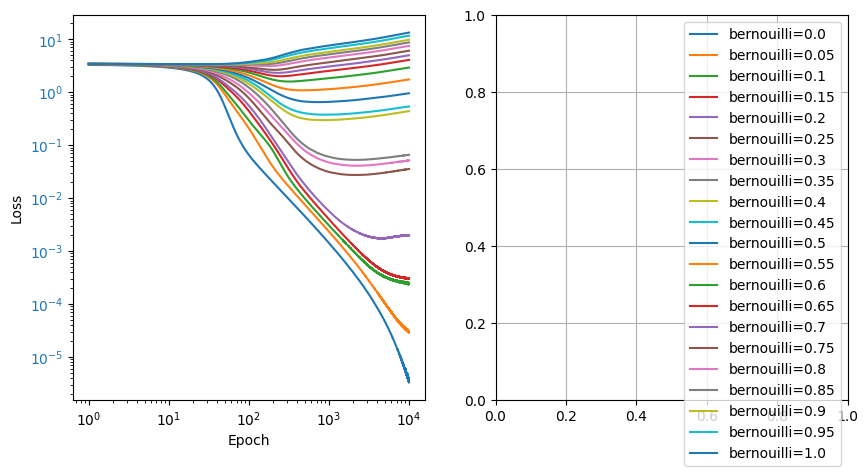

In [22]:
name = 'test_loss'

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
color = 'C0'
legend = []
all_plots = []
for val, val_std in zip(all_mean, all_std):
    a, = ax.plot(val[name])
    all_plots.append(a)
    # ax.fill_between(val.index, val[name] - val_std[name], val[name] + val_std[name], alpha=0.5)
    leg = ' '.join([f'{key}={val[key].values[0]}' for key in keys])
    legend.append(leg)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.tick_params(axis='y', labelcolor=color)
# ax.set_ylim(4.5, 4.75)

ax = axes[1]
ax.legend(all_plots, legend)

# ax2 = ax.twinx()
# color = 'C1'
# for val, val_std in zip([compression_mean, mean1], [compression_std, std]):
#     ax2.plot(val['nb_factors'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylabel(r'Number $k$ of factors')

ax.grid()
fig.savefig(IMAGE_DIR / 'filtration.pdf')
# ax2.grid(alpha=0.25)

In [60]:
tmp = res[res['data_complexity'] == res['data_complexity'].unique().max()]

In [61]:
tmp

,loss,test_loss,input_factors,output_factors,parents,bernouilli,alphas,data_split,emb_dim,ffn_dim,...,batch_size,mode,seed,unique_id,input_size,output_size,data_complexity,epoch,train_entropy,test_entropy
1880000,3.198121,3.216247,"[2, 2, 2, 3, 3, 5]",[30],"[[0, 1, 2, 3, 4, 5]]",0.5,0.01,0.9,32,64,...,None,generalization,3,7a7267e5643c4d29bf4fc5e1473c4cf3,360,30,10800,1,0.361361,0.360312
1880001,3.188346,3.213780,"[2, 2, 2, 3, 3, 5]",[30],"[[0, 1, 2, 3, 4, 5]]",0.5,0.01,0.9,32,64,...,None,generalization,3,7a7267e5643c4d29bf4fc5e1473c4cf3,360,30,10800,2,0.361361,0.360312
1880002,3.178724,3.211550,"[2, 2, 2, 3, 3, 5]",[30],"[[0, 1, 2, 3, 4, 5]]",0.5,0.01,0.9,32,64,...,None,generalization,3,7a7267e5643c4d29bf4fc5e1473c4cf3,360,30,10800,3,0.361361,0.360312
1880003,3.169252,3.209523,"[2, 2, 2, 3, 3, 5]",[30],"[[0, 1, 2, 3, 4, 5]]",0.5,0.01,0.9,32,64,...,None,generalization,3,7a7267e5643c4d29bf4fc5e1473c4cf3,360,30,10800,4,0.361361,0.360312
1880004,3.159925,3.207671,"[2, 2, 2, 3, 3, 5]",[30],"[[0, 1, 2, 3, 4, 5]]",0.5,0.01,0.9,32,64,...,None,generalization,3,7a7267e5643c4d29bf4fc5e1473c4cf3,360,30,10800,5,0.361361,0.360312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8969995,0.000216,10.895093,[360],[30],[[0]],0.5,0.01,0.9,32,64,...,None,generalization,57,7847cf0bfb754ea7901b38aed81abe65,360,30,10800,9996,0.411692,0.452791
8969996,0.000225,10.894969,[360],[30],[[0]],0.5,0.01,0.9,32,64,...,None,generalization,57,7847cf0bfb754ea7901b38aed81abe65,360,30,10800,9997,0.411692,0.452791
8969997,0.000234,10.895723,[360],[30],[[0]],0.5,0.01,0.9,32,64,...,None,generalization,57,7847cf0bfb754ea7901b38aed81abe65,360,30,10800,9998,0.411692,0.452791
8969998,0.000245,10.895412,[360],[30],[[0]],0.5,0.01,0.9,32,64,...,None,generalization,57,7847cf0bfb754ea7901b38aed81abe65,360,30,10800,9999,0.411692,0.452791
